In [61]:
#importing
import numpy as np
import tensorflow as tf
import keras
from tensorflow.keras.utils import img_to_array, load_img
from keras.applications.inception_resnet_v2 import InceptionResNetV2, decode_predictions, preprocess_input
from IPython.core.display import display
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input as preprocess_input_X
from tensorflow.keras.applications.xception import decode_predictions as decode_X

In [25]:
#assigning
file_1 = '01 Umbrella.jpg'
file_2 = '02 Couple.jpg'
file_3 = '03 Ocean.jpg'
file_4 = '04 Horse.jpg'
file_5 = '05 City.jpg'
file_6 = '06 Feet.jpg'
file_7 = '07 Stairs.jpg'
file_8 = '08 Doorway.jpg'
file_9 = '09 Ice Cream.jpg'
file_10 = '10 Red Shoes.jpg'
file_11 = '11 Shoe.jpg'

Preprocessing Images

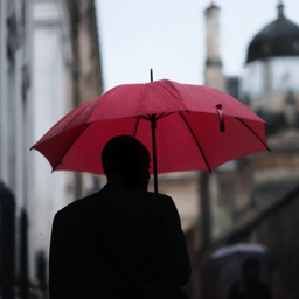

In [26]:
pic = load_img(file_1, target_size=(299,299))
display(pic)

In [27]:
pic_array=img_to_array(pic)
pic_array.shape
#256 by 256 pixel & 3 channels

(299, 299, 3)

In [43]:
def format_img_inceptionresnet(filename):
  pic = load_img(filename,target_size=(299,299))
  pic_arr = img_to_array(pic)
  expanded = np.expand_dims(pic_arr,axis=0)
  return preprocess_input(expanded)

In [67]:
def format_img_X(filename):
  pic = load_img(filename,target_size=(299,299))
  pic_arr = img_to_array(pic)
  expanded = np.expand_dims(pic_arr,axis=0)
  return preprocess_input_X(expanded)

Loading the InceptionResNet

In [28]:
%%time
inception_model = InceptionResNetV2(weights='imagenet')

CPU times: user 5.43 s, sys: 144 ms, total: 5.57 s
Wall time: 5.6 s


In [29]:
inception_model.graph = tf.compat.v1.get_default_graph()

# Making Predictions

In [30]:
expanded = np.expand_dims(pic_array,axis=0)
expanded.shape

(1, 299, 299, 3)

In [39]:
preprocessed = preprocess_input(expanded)

In [44]:
prediction = inception_model.predict(preprocessed)
decode_predictions(prediction)

1/1 [==============================] - 0s 38ms/step


[[('n03196217', 'digital_clock', 0.14030753),
  ('n03729826', 'matchstick', 0.11451059),
  ('n01930112', 'nematode', 0.07775236),
  ('n03590841', "jack-o'-lantern", 0.03231668),
  ('n03666591', 'lighter', 0.020330355)]]

1/1 [==============================] - 0s 53ms/step


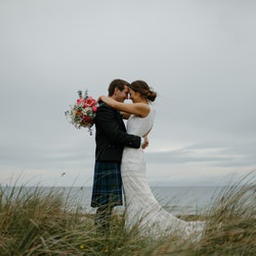

[[('n10148035', 'groom', 0.7042375),
  ('n03450230', 'gown', 0.11669627),
  ('n11879895', 'rapeseed', 0.016582688),
  ('n09421951', 'sandbar', 0.0127906725),
  ('n03534580', 'hoopskirt', 0.0072878115)]]

In [46]:
data = format_img_inceptionresnet(file_2)
prediction = inception_model.predict(data)
display(load_img(file_2))
decode_predictions(prediction)

# Using the Xception image classification Model

In [60]:
xception_model = Xception()

91884032/91884032 [==============================] - 0s 0us/step


1/1 [==============================] - 1s 1s/step


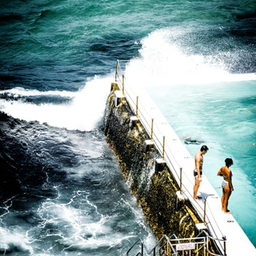

[[('n04347754', 'submarine', 0.29233092),
  ('n02894605', 'breakwater', 0.14988339),
  ('n03662601', 'lifeboat', 0.09042307),
  ('n03240683', 'drilling_platform', 0.021468299),
  ('n04273569', 'speedboat', 0.01862262)]]

In [68]:
data = format_img_X(file_3)
pred = xception_model.predict(data)
display(load_img(file_3))
decode_X(pred)

1/1 [==============================] - 0s 23ms/step


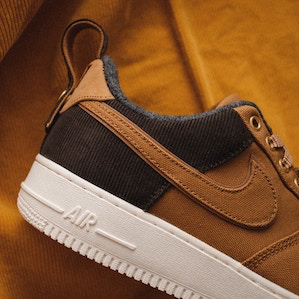

[[('n04120489', 'running_shoe', 0.4330915),
  ('n04133789', 'sandal', 0.15564331),
  ('n03680355', 'Loafer', 0.03307817),
  ('n03047690', 'clog', 0.026450552),
  ('n04026417', 'purse', 0.020854443)]]

In [72]:
data = format_img_X(file_11)
pred = xception_model.predict(data)
display(load_img(file_11))
decode_X(pred)